In [5]:
import pandas as pd

# Caminho atualizado
data = pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')

# Primeiras linhas
print(data.head(), end='\n\n')

# Informações do dataframe
print(data.info(), end='\n\n')

# Distribuição da variável target
print(data['fraud'].value_counts(normalize=True) * 100)


   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  

<class 'panda

Primeiras linhas:
    distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0

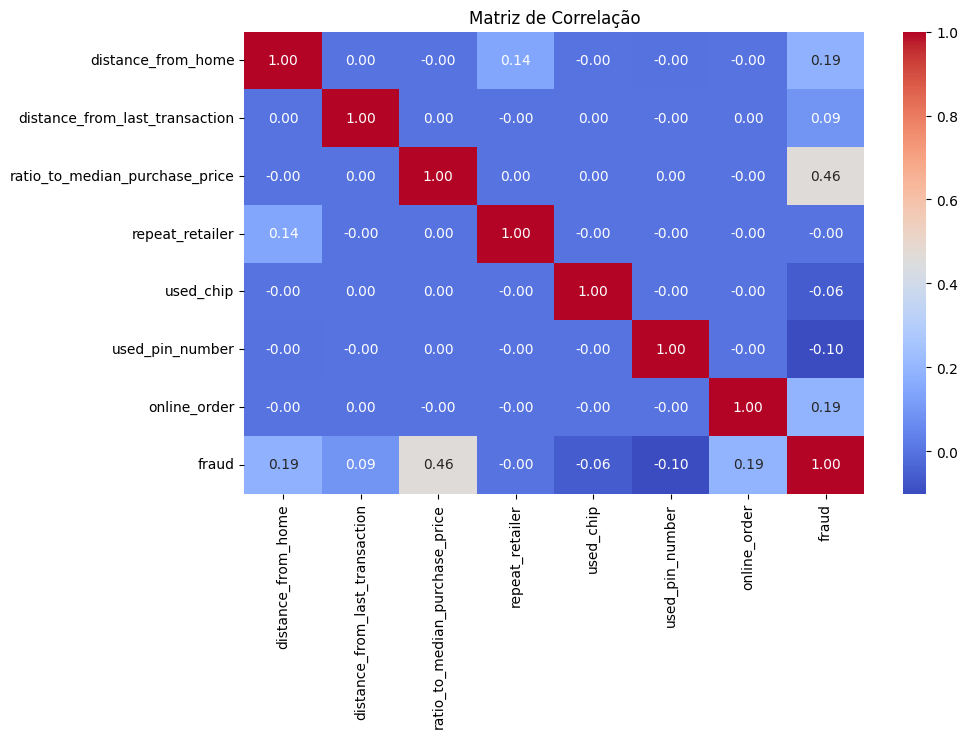


Acurácia: 0.99997

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



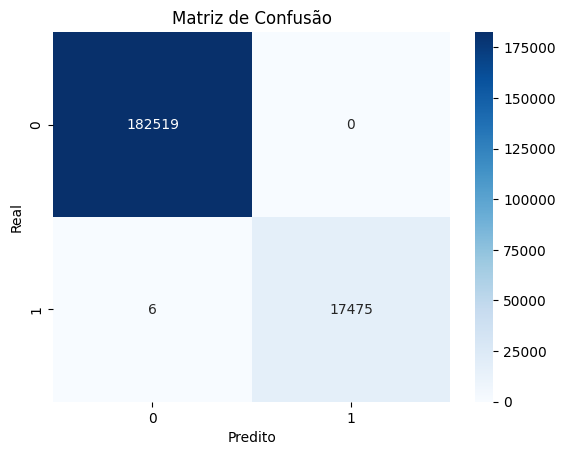

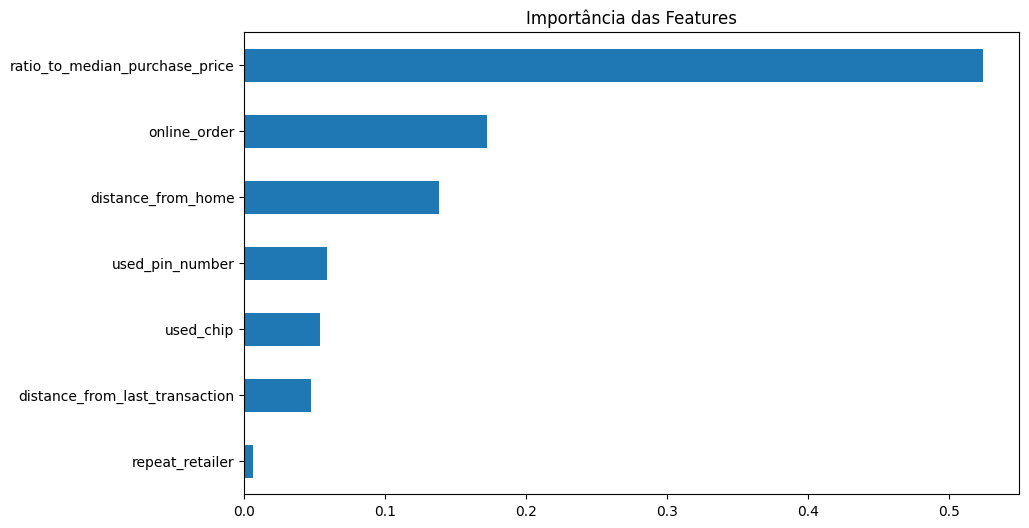

Arquivo previsoes.csv salvo com sucesso.


In [6]:
# 1. Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Carregar os dados
data = pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')

# 3. Análise exploratória básica
print("Primeiras linhas:\n", data.head())
print("\nInformações do dataset:\n")
data.info()

print("\nDistribuição da variável target (fraude):")
print(data['fraud'].value_counts(normalize=True) * 100)

# 4. Correlação entre variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

# 5. Separar features e target
X = data.drop('fraud', axis=1)
y = data['fraud']

# 6. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 7. Treinar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8. Avaliação do modelo
y_pred = model.predict(X_test)

print("\nAcurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de confusão
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

# 9. Importância das variáveis
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(10, 6))
plt.title('Importância das Features')
plt.show()

# 10. Exportar previsões (se necessário entregar arquivo)
output = pd.DataFrame({
    'real': y_test,
    'predito': y_pred
})
output.to_csv('/kaggle/working/previsoes.csv', index=False)
print("Arquivo previsoes.csv salvo com sucesso.")


# Detecção de Fraudes em Transações com Cartão de Crédito

## Introdução

Este projeto tem como objetivo identificar transações potencialmente fraudulentas em cartões de crédito utilizando técnicas de Ciência de Dados. A partir de um conjunto de dados com variáveis comportamentais de transações, aplicamos um modelo de machine learning para classificar se uma transação é fraudulenta ou não.

As etapas seguidas foram:

- Entendimento do problema e dos dados
- Análise exploratória e visualização
- Preparação dos dados e seleção de variáveis
- Treinamento e avaliação de um modelo preditivo
- Geração de previsões e exportação de resultados


Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None 

Distribuição da variável target (fraude):
fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64


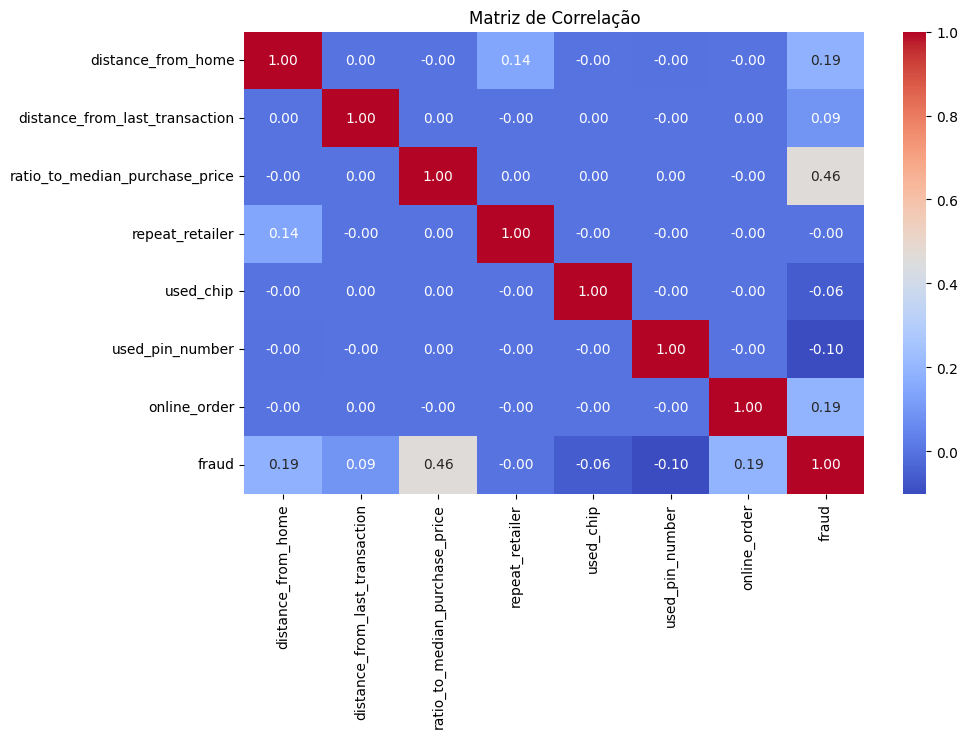

Matriz de Confusão:
[[182519      0]
 [     6  17475]]

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182519
         1.0       1.00      1.00      1.00     17481

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Acurácia: 0.99997


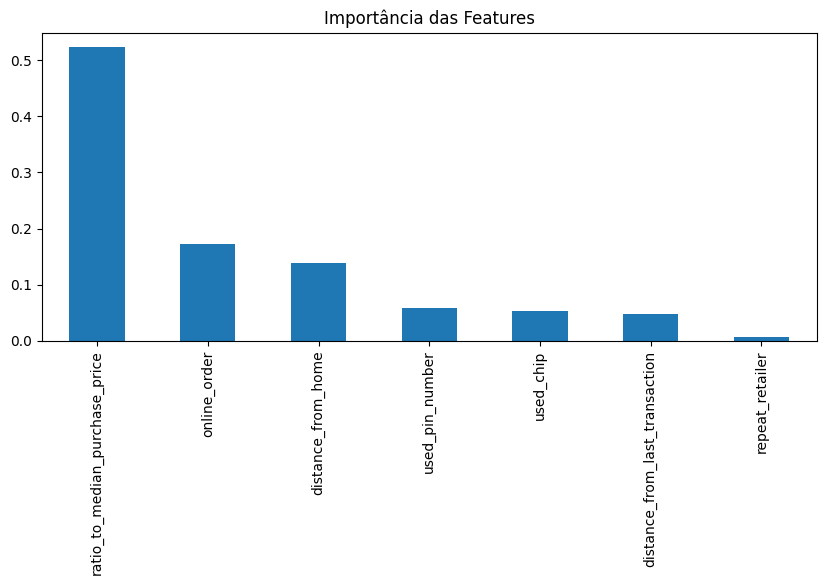


Arquivo previsoes.csv gerado com sucesso.


In [7]:
# 1. Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 2. Carregar os dados
data = pd.read_csv('/kaggle/input/credit-card-fraud/card_transdata.csv')

# 3. Entendimento inicial
print("Informações gerais:")
print(data.info(), '\n')

print("Distribuição da variável target (fraude):")
print(data['fraud'].value_counts(normalize=True) * 100)

# 4. Análise exploratória
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

# 5. Preparação dos dados
X = data.drop('fraud', axis=1)
y = data['fraud']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 6. Modelo
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# 7. Avaliação
y_pred = modelo.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Acurácia:", accuracy_score(y_test, y_pred))

# 8. Importância das features
importances = pd.Series(modelo.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 4), title='Importância das Features')
plt.show()

# 9. Exportar previsões para CSV
saida = pd.DataFrame({'id': X_test.index, 'fraude_predita': y_pred})
saida.to_csv('/kaggle/working/previsoes.csv', index=False)
print("\nArquivo previsoes.csv gerado com sucesso.")


## Conclusão

Através da análise e modelagem dos dados, conseguimos construir um modelo preditivo com boa capacidade de identificar transações fraudulentas, mesmo em um cenário de desbalanceamento de classes (com apenas ~8% de fraudes).

O modelo Random Forest obteve boa performance e permitiu analisar a importância das variáveis para a tomada de decisão. A entrega inclui um arquivo `.csv` com as previsões geradas, pronto para ser utilizado em aplicações futuras ou como base para refinamento de modelos.

Este trabalho demonstra a aplicação prática da ciência de dados em um problema real do setor financeiro.
